In [1]:
import torch
import torch.nn as nn
import imageio
from skimage.transform import rescale
from matplotlib import pyplot as plt
import operator
import numpy as np
import math

In [2]:
# Neural Network
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        
        self.encoder = torch.nn.Sequential(
            nn.Linear(D_in, H1),
            nn.ReLU(),
            nn.Linear(H1, D_out)
        )

        self.decoder = torch.nn.Sequential(
            nn.Linear(D_out, H1),
            nn.ReLU(),
            nn.Linear(H1, D_in),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
model = torch.load("../data/models/ae_x2_sigmoid.pt")
model.eval()

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=1800, out_features=1350, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1350, out_features=900, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=900, out_features=1350, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1350, out_features=1800, bias=True)
    (3): Sigmoid()
  )
)

In [4]:
model.decoder

Sequential(
  (0): Linear(in_features=900, out_features=1350, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1350, out_features=1800, bias=True)
  (3): Sigmoid()
)

(300, 300, 3)


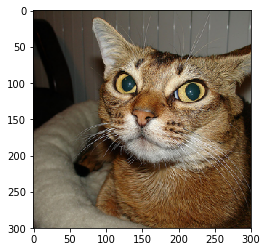

In [5]:
image_file = "../data/CAT_00/00000001_020.jpg"
img = imageio.imread(image_file)
image_target_size = (300, 300)

if img.shape[0] <= img.shape[1]:
    xy = img.shape[0]
else:
    xy = img.shape[1]
if xy > image_target_size[0]:
    img = rescale(image=img, scale=image_target_size[0]/xy, multichannel=True, anti_aliasing=True)
        
def cropND(img, image_target_size):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, image_target_size))
    end = tuple(map(operator.add, start, image_target_size))
    slices = tuple(map(slice, start, end))
    return img[slices]

img = cropND(img, image_target_size)
print(img.shape)
plt.imshow(img, interpolation='none')
plt.show()

In [6]:
def reshape_img_to_vec(img):
    return img.reshape(img.shape[0]*img.shape[1], 3)

img_vec = reshape_img_to_vec(img)
img_vec.shape

(90000, 3)

In [7]:
image_chop = 50
img_vec = img_vec.reshape(int(1 * image_chop), int(img_vec.shape[0] / image_chop), 3)
img_vec.shape

(50, 1800, 3)

In [8]:
x = torch.tensor(img_vec, dtype = torch.float32).transpose(1,2)

In [9]:
x.shape

torch.Size([50, 3, 1800])

In [10]:
up_scaled = model.forward(x).transpose(1,2)

In [11]:
up_scaled.shape

torch.Size([50, 1800, 3])

In [12]:
up_scaled = up_scaled.detach().numpy()

In [13]:
up_scaled.shape

(50, 1800, 3)

In [14]:
up_scaled.transpose(0,1,2).reshape(-1,3).shape

(90000, 3)

In [15]:
up_img = up_scaled.reshape(300, 300, 3)

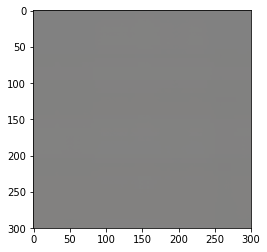

In [16]:
plt.imshow(up_img, interpolation='none')
plt.show()

In [17]:
mse = np.sum((up_img - img)*(up_img - img))
mse / 270000

0.06426519773888317